# A beginner's guide to PySDDR

We start by importing the sddr module and other required libraries:

In [ ]:
import os
# Change to the desired directory
# os.chdir('/hkfs/home/haicore/scc/pa6512/PySSDR/')

print(os.getcwd())

: 

In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
from sddr import Sddr
import torch.nn as nn
import pandas as pd
import torch.optim as optim

ModuleNotFoundError: No module named 'numpy'

# First use case: A Simple GAM Poisson Distribution

### User inputs 

First the user defines the data to be used:

In [32]:
# define data location
data_path = '../data/simple_gam/X.csv'
target_path = '../data/simple_gam/Y.csv'
# read data into pandas dataframe
data = pd.read_csv(data_path,delimiter=';')
target = pd.read_csv(target_path)
# split the data into train and test to use later for predictions
train_data = data.iloc[:800]
train_target = target.iloc[:800]
test_data = data.iloc[800:]

In [33]:
train_data

,x1,x2
0,0.159362,1.820832
1,-0.801953,-1.098624
2,0.898769,1.322290
3,-0.591773,0.217637
4,0.483823,1.811813
...,...,...
795,0.635545,0.520376
796,0.964305,1.952867
797,-1.715956,1.037898
798,-1.861070,0.190763


In [34]:
train_target

,y
0,1
1,12
2,2
3,2
4,1
...,...
795,1
796,0
797,18
798,68


Next the distribution, formulas and training parameters are defined. The neural netowrks here are not expected to truly contribute to the networks performance as our data includes only structured data. However, they are given in the formula for the user to understand the full power of the PySDDR package.  

In [35]:
# define distribution and the formula for the distibutional parameter
distribution  = 'Poisson'
formulas = {'rate': '~1+spline(x1, bs="bs",df=9)+spline(x2, bs="bs",df=9)+d1(x1)+d2(x2)'}

# define the deep neural networks' architectures and output shapes used in the above formula
deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

# define your training hyperparameters
train_parameters = {
    'batch_size': 1000,
    'epochs': 200,
    'degrees_of_freedom': {'rate': 6},
    'optimizer' : optim.RMSprop,
    'val_split': 0.1,
    'dropout_rate': 0.1
    }

# define output directory
output_dir = './outputs'

Alternatively these parameters can be defined in a config file (for example see config.yaml)

### Initialization

The sddr instance is initialized with the parameters given by the user in the previous step:

In [36]:
sddr = Sddr(distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters,
            output_dir=output_dir)

Using device:  cpu


Alternatively, the initialization can be done with a config file:

In [37]:
'''
import yaml

# get config
def get_config(config):
    with open(config, 'r') as stream:
        return yaml.safe_load(stream)

#load config file
config = get_config('config.yaml') 
# initialize sddr instance
sddr = Sddr(config=config)
'''

"\nimport yaml\n\n# get config\ndef get_config(config):\n    with open(config, 'r') as stream:\n        return yaml.safe_load(stream)\n\n#load config file\nconfig = get_config('config.yaml') \n# initialize sddr instance\nsddr = Sddr(config=config)\n"

Since this will load all data from a file without splitting into train and test as we have done above, we have commented this part out for now. Also note that the config.yaml option currently only works if the deep networks are defined as in the ```config.yaml``` (directly with modules from torch.nn given as strings) and does not accept local scripts or torch models

### Training

The sddr network is trained with the data defined above and the loss curve is plotted. Note that in this example we only have tabular data so unstructured_data is not given.

Beginning training ...
Train Epoch: 0 	 Training Loss: 161.291229
Train Epoch: 0 	 Validation Loss: 112.488159
Train Epoch: 20 	 Training Loss: 92.406868
Train Epoch: 20 	 Validation Loss: 68.178108
Train Epoch: 40 	 Training Loss: 63.644611
Train Epoch: 40 	 Validation Loss: 52.538128
Train Epoch: 60 	 Training Loss: 45.252533
Train Epoch: 60 	 Validation Loss: 42.182220
Train Epoch: 80 	 Training Loss: 33.096230
Train Epoch: 80 	 Validation Loss: 25.041765
Train Epoch: 100 	 Training Loss: 20.733883
Train Epoch: 100 	 Validation Loss: 17.310497
Train Epoch: 120 	 Training Loss: 21.699142
Train Epoch: 120 	 Validation Loss: 25.202042
Train Epoch: 140 	 Training Loss: 20.947823
Train Epoch: 140 	 Validation Loss: 16.508320
Train Epoch: 160 	 Training Loss: 16.115967
Train Epoch: 160 	 Validation Loss: 14.809446
Train Epoch: 180 	 Training Loss: 17.369884
Train Epoch: 180 	 Validation Loss: 17.361099


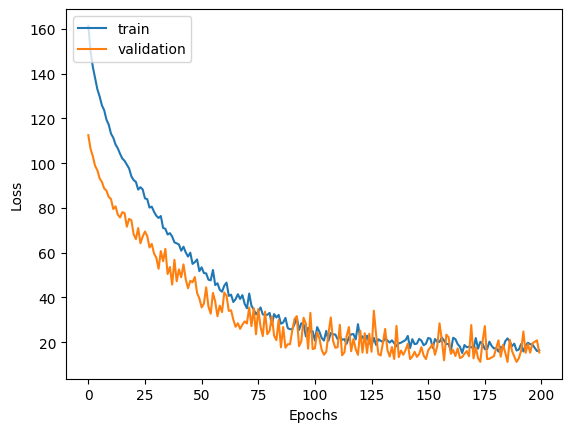

In [41]:
sddr.train(structured_data=train_data,
           target=train_target,
           plot=True)

In [39]:
sddr.dataset[:]["datadict"]

{'rate': {'structured': tensor([[ 1.0000, -0.0467, -0.0889,  ..., -0.0595,  0.3716,  0.4430],
          [ 1.0000, -0.0467, -0.0825,  ..., -0.1237, -0.0772, -0.0419],
          [ 1.0000, -0.0467, -0.0889,  ...,  0.4058,  0.2647, -0.0382],
          ...,
          [ 1.0000,  0.1465,  0.5157,  ...,  0.4277,  0.0160, -0.0419],
          [ 1.0000,  0.4533,  0.3563,  ..., -0.1122, -0.0772, -0.0419],
          [ 1.0000,  0.0151,  0.4812,  ...,  0.3205, -0.0463, -0.0419]]),
  'd1': tensor([[ 1.5936e-01],
          [-8.0195e-01],
          [ 8.9877e-01],
          [-5.9177e-01],
          [ 4.8382e-01],
          [-1.2854e+00],
          [ 1.4318e-01],
          [-1.8957e+00],
          [-1.3089e+00],
          [-4.4393e-03],
          [ 1.6508e+00],
          [-1.8934e+00],
          [ 1.1111e+00],
          [ 1.6003e+00],
          [-8.1026e-01],
          [-1.8922e+00],
          [ 1.3506e+00],
          [-1.7321e+00],
          [-1.0311e+00],
          [ 4.9181e-01],
          [-1.7967e+00]

In [7]:
sddr.dataset.get_list_of_feature_names()

['x1', 'x2']

In [8]:
sddr.dataset.prepared_data.keys() # M

dict_keys(['rate'])

In [9]:
sddr.dataset.prepared_data['rate'].keys()

dict_keys(['structured', 'd1', 'd2'])

In [10]:
sddr.dataset.prepared_data['rate']['structured'].shape

torch.Size([800, 19])

In [13]:
sddr.dataset.prepared_data['rate']['structured']

tensor([[ 1.0000, -0.0467, -0.0889,  ..., -0.0595,  0.3716,  0.4430],
        [ 1.0000, -0.0467, -0.0825,  ..., -0.1237, -0.0772, -0.0419],
        [ 1.0000, -0.0467, -0.0889,  ...,  0.4058,  0.2647, -0.0382],
        ...,
        [ 1.0000,  0.1465,  0.5157,  ...,  0.4277,  0.0160, -0.0419],
        [ 1.0000,  0.4533,  0.3563,  ..., -0.1122, -0.0772, -0.0419],
        [ 1.0000,  0.0151,  0.4812,  ...,  0.3205, -0.0463, -0.0419]])

In [142]:
sddr.prepare_data.P['rate'].size()

torch.Size([19, 19])

In [144]:
sddr.prepare_data.network_info_dict

{'rate': {'deep_models_dict': {'d1': Sequential(
     (0): Linear(in_features=1, out_features=15, bias=True)
   ),
   'd2': Sequential(
     (0): Linear(in_features=1, out_features=3, bias=True)
     (1): ReLU()
     (2): Linear(in_features=3, out_features=8, bias=True)
   )},
  'deep_shapes': {'d1': 15, 'd2': 8},
  'orthogonalization_pattern': {'d1': [slice(0, 1, None), slice(1, 10, None)],
   'd2': [slice(0, 1, None), slice(10, 19, None)]},
  'struct_shapes': 19}}

In [146]:
sddr.prepare_data.structured_matrix_design_info['rate']

DesignInfo(['Intercept',
            'spline(x1, bs="bs", df=9)[0]',
            'spline(x1, bs="bs", df=9)[1]',
            'spline(x1, bs="bs", df=9)[2]',
            'spline(x1, bs="bs", df=9)[3]',
            'spline(x1, bs="bs", df=9)[4]',
            'spline(x1, bs="bs", df=9)[5]',
            'spline(x1, bs="bs", df=9)[6]',
            'spline(x1, bs="bs", df=9)[7]',
            'spline(x1, bs="bs", df=9)[8]',
            'spline(x2, bs="bs", df=9)[0]',
            'spline(x2, bs="bs", df=9)[1]',
            'spline(x2, bs="bs", df=9)[2]',
            'spline(x2, bs="bs", df=9)[3]',
            'spline(x2, bs="bs", df=9)[4]',
            'spline(x2, bs="bs", df=9)[5]',
            'spline(x2, bs="bs", df=9)[6]',
            'spline(x2, bs="bs", df=9)[7]',
            'spline(x2, bs="bs", df=9)[8]'],
           factor_infos={EvalFactor('spline(x1, bs="bs", df=9)'): FactorInfo(factor=EvalFactor('spline(x1, bs="bs", df=9)'),
                                    type='numerical',
   

In [161]:
from patsy import dmatrix, build_design_matrices

tensor([[ 1.0000, -0.0467, -0.0889,  ..., -0.1237, -0.0772, -0.0419],
        [ 1.0000, -0.0467, -0.0889,  ..., -0.1237, -0.0772, -0.0419],
        [ 1.0000, -0.0467, -0.0889,  ..., -0.1237, -0.0772, -0.0419],
        ...,
        [ 1.0000, -0.0467, -0.0889,  ..., -0.1237, -0.0772, -0.0419],
        [ 1.0000, -0.0467, -0.0889,  ..., -0.1199, -0.0772, -0.0419],
        [ 1.0000, -0.0467, -0.0637,  ..., -0.1237, -0.0772, -0.0419]])

In [180]:
structured_matrix = build_design_matrices([sddr.prepare_data.structured_matrix_design_info['rate']],
                                          train_data, NA_action='raise', return_type='dataframe')[0]

In [163]:
structured_matrix

,Intercept,"spline(x1, bs=""bs"", df=9)[0]","spline(x1, bs=""bs"", df=9)[1]","spline(x1, bs=""bs"", df=9)[2]","spline(x1, bs=""bs"", df=9)[3]","spline(x1, bs=""bs"", df=9)[4]","spline(x1, bs=""bs"", df=9)[5]","spline(x1, bs=""bs"", df=9)[6]","spline(x1, bs=""bs"", df=9)[7]","spline(x1, bs=""bs"", df=9)[8]","spline(x2, bs=""bs"", df=9)[0]","spline(x2, bs=""bs"", df=9)[1]","spline(x2, bs=""bs"", df=9)[2]","spline(x2, bs=""bs"", df=9)[3]","spline(x2, bs=""bs"", df=9)[4]","spline(x2, bs=""bs"", df=9)[5]","spline(x2, bs=""bs"", df=9)[6]","spline(x2, bs=""bs"", df=9)[7]","spline(x2, bs=""bs"", df=9)[8]"
0,1.0,0.000000,0.000000e+00,0.000000,0.076051,0.630836,0.292060,0.001053,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.002041,0.064196,0.448806,0.484956
1,1.0,0.000000,6.375089e-03,0.320117,0.600528,0.072981,0.000000,0.000000,0.000000e+00,0.0,0.0,0.068006,0.543329,3.833922e-01,0.005273,0.000000,0.000000,0.000000,0.000000
2,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.029021,0.555060,0.399426,1.649271e-02,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.124774,0.529538,0.341914,0.003774
3,1.0,0.000000,1.517939e-13,0.144998,0.654533,0.200469,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,2.204635e-02,0.502324,0.460228,0.015402,0.000000,0.000000
4,1.0,0.000000,0.000000e+00,0.000000,0.002450,0.314759,0.621460,0.061331,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.002385,0.070602,0.462859,0.464155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.165120,0.684989,0.149891,2.266385e-11,0.0,0.0,0.000000,0.000000,7.251391e-08,0.193037,0.674436,0.132527,0.000000,0.000000
796,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.015111,0.492072,0.460706,3.211184e-02,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000022,0.003544,0.132275,0.864159
797,1.0,0.193243,6.045833e-01,0.190369,0.011805,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.002585,0.352765,0.551430,0.093220,0.000000
798,1.0,0.500011,4.451609e-01,0.053448,0.001380,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,2.835076e-02,0.528326,0.431837,0.011487,0.000000,0.000000


In [181]:
spline_info = sddr.prepare_data.dm_info_dict['rate']['spline_info'] # are all structured data
non_spline_info = sddr.prepare_data.dm_info_dict['rate']['non_spline_info']

In [182]:
for spline_slice, spline_input_features in zip(spline_info['list_of_spline_slices'], 
                                                   spline_info['list_of_spline_input_features']):
    
    X = structured_matrix.iloc[:,spline_slice]
    print(X.shape)
    # construct constraint matrix
    constraints = []
    for non_spline_slice, non_spline_input_features in zip(non_spline_info['list_of_non_spline_slices'], non_spline_info['list_of_non_spline_input_features']):
        # print(set(non_spline_input_features))
        # print(set(spline_input_features))
        if set(non_spline_input_features).issubset(set(spline_input_features)):
            constraints.append(structured_matrix.iloc[:,non_spline_slice].values)

    if len(constraints)>0:
        constraints = np.concatenate(constraints,axis=1)
        print(constraints.shape)
        Q, _ = np.linalg.qr(constraints) # compute Q
        Projection_Matrix = np.matmul(Q,Q.T)
        constrained_X = X - np.matmul(Projection_Matrix,X)
        print(constrained_X.shape)
        # constrained_X = _orthogonalize(constraints, np.array(X))
        structured_matrix.iloc[:,spline_slice] = constrained_X

(800, 9)
(800, 1)
(800, 9)
(800, 9)
(800, 1)
(800, 9)


In [176]:
structured_matrix

,Intercept,"spline(x1, bs=""bs"", df=9)[0]","spline(x1, bs=""bs"", df=9)[1]","spline(x1, bs=""bs"", df=9)[2]","spline(x1, bs=""bs"", df=9)[3]","spline(x1, bs=""bs"", df=9)[4]","spline(x1, bs=""bs"", df=9)[5]","spline(x1, bs=""bs"", df=9)[6]","spline(x1, bs=""bs"", df=9)[7]","spline(x1, bs=""bs"", df=9)[8]","spline(x2, bs=""bs"", df=9)[0]","spline(x2, bs=""bs"", df=9)[1]","spline(x2, bs=""bs"", df=9)[2]","spline(x2, bs=""bs"", df=9)[3]","spline(x2, bs=""bs"", df=9)[4]","spline(x2, bs=""bs"", df=9)[5]","spline(x2, bs=""bs"", df=9)[6]","spline(x2, bs=""bs"", df=9)[7]","spline(x2, bs=""bs"", df=9)[8]"
0,1.0,-0.046731,-0.088883,-0.118086,-0.082806,0.459263,0.108139,-0.119650,-0.073915,-0.037331,-0.042745,-0.079961,-0.122545,-0.168156,-0.172210,-0.169446,-0.059539,0.371583,0.443018
1,1.0,-0.046731,-0.082508,0.202030,0.441671,-0.098593,-0.183920,-0.120703,-0.073915,-0.037331,-0.042745,-0.011956,0.420784,0.215237,-0.166937,-0.171488,-0.123736,-0.077223,-0.041938
2,1.0,-0.046731,-0.088883,-0.118086,-0.158857,-0.142553,0.371140,0.278723,-0.057422,-0.037331,-0.042745,-0.079961,-0.122545,-0.168156,-0.172210,-0.046714,0.405802,0.264692,-0.038164
3,1.0,-0.046731,-0.088883,0.026912,0.495676,0.028895,-0.183920,-0.120703,-0.073915,-0.037331,-0.042745,-0.079961,-0.122545,-0.146109,0.330114,0.288740,-0.108334,-0.077223,-0.041938
4,1.0,-0.046731,-0.088883,-0.118086,-0.156407,0.143185,0.437539,-0.059372,-0.073915,-0.037331,-0.042745,-0.079961,-0.122545,-0.168156,-0.172210,-0.169103,-0.053134,0.385636,0.422217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,-0.046731,-0.088883,-0.118086,-0.158857,-0.006454,0.501069,0.029188,-0.073915,-0.037331,-0.042745,-0.079961,-0.122545,-0.168155,0.020827,0.502949,0.008791,-0.077223,-0.041938
796,1.0,-0.046731,-0.088883,-0.118086,-0.158857,-0.156463,0.308151,0.340003,-0.041803,-0.037331,-0.042745,-0.079961,-0.122545,-0.168156,-0.172210,-0.171465,-0.120192,0.055052,0.822221
797,1.0,0.146512,0.515700,0.072282,-0.147052,-0.171574,-0.183920,-0.120703,-0.073915,-0.037331,-0.042745,-0.079961,-0.122545,-0.168156,-0.169624,0.181277,0.427695,0.015997,-0.041938
798,1.0,0.453280,0.356278,-0.064639,-0.157477,-0.171574,-0.183920,-0.120703,-0.073915,-0.037331,-0.042745,-0.079961,-0.122545,-0.139805,0.356116,0.260349,-0.112249,-0.077223,-0.041938


In [187]:
def get_P_from_design_matrix(dm, dfs):
    """
    Computes and returns the penalty matrix that corresponds to a patsy design matrix. The penalties are multiplied by the regularization parameters lambda
    computed from given degrees of freedom.
    The result is a single block diagonal penalty matrix that combines the penalty matrices of each term in the formula that was used to create the design
    matrix. Only smooting splines terms have a non-zero penalty matrix.
    The degrees of freedom can either be given as a single value, then all individual penalty matrices are multiplied with a single lambda.
    Or they can be given as a list, then all (non-zero) penalty matrices are multiplied by different lambdas. The multiplication is in the order of the terms
    in the formula.
    
    Parameters
    ----------
        dm: patsy.dmatrix
            The design matrix for the structured part of the formula - computed by patsy.
        dfs: int or list of ints
            Degrees from freedom from which the smoothing parameter lambda is computed.
            Either a single value for all penalities of all splines, or a list of values, each for one of the splines that appear 
            in the formula.

    Returns
    -------
        big_P: numpy array
            The penalty matrix of the design matrix.
    """
    factor_infos = dm.design_info.factor_infos
    terms = dm.design_info.terms
    
    big_P = np.zeros((dm.shape[1],dm.shape[1]))
    
    spline_counter = 0
    
    for term in terms:
        dm_term_name = term.name()

        # get the slice object for this term (corresponding to start and end index in the design matrix)
        slice_of_term = dm.design_info.term_name_slices[dm_term_name]

        # currently we only use smoothing for 1D, in the future we also want to add smoothing for tensorproducts
        if len(term.factors) == 1:
            factor_info = factor_infos[term.factors[0]]
            num_columns = factor_info.num_columns
            
            P = _get_penalty_matrix_from_factor_info(factor_info)
                
            if P is not False:
                df = dfs[spline_counter] if type(dfs) == list else dfs
                dm_spline = dm.iloc[:,slice_of_term]

                # Regularization parameters are given in degrees of freedom. Here they are converted to lambda.
                df_lam = df2lambda(dm_spline, P[0], df)
                big_P[slice_of_term,slice_of_term] = P[0]*df_lam[1]
                spline_counter += 1
    return big_P

In [185]:
dfs = sddr.prepare_data.degrees_of_freedom['rate']

In [245]:

obj, P = get_P_from_design_matrix(structured_matrix, dfs)  

FactorInfo(factor=EvalFactor('spline(x1, bs="bs", df=9)'),
           type='numerical',
           state=<factor state>,
           num_columns=9)
True
False
False
FactorInfo(factor=EvalFactor('spline(x2, bs="bs", df=9)'),
           type='numerical',
           state=<factor state>,
           num_columns=9)
True
False
False


In [262]:
obj.penalty_matrices[0].shape

(9, 9)

In [263]:
sddr.net.single_parameter_sddr_list

{'rate': SddrFormulaNet(
   (d1): Sequential(
     (0): Linear(in_features=1, out_features=15, bias=True)
   )
   (d2): Sequential(
     (0): Linear(in_features=1, out_features=3, bias=True)
     (1): ReLU()
     (2): Linear(in_features=3, out_features=8, bias=True)
   )
   (structured_head): Linear(in_features=19, out_features=1, bias=False)
   (deep_head): Linear(in_features=23, out_features=1, bias=False)
 )}

In [249]:
isinstance(obj, type(obj))

True

In [208]:
P.sum()

np.float64(0.0)

In [ ]:
orthogonalization_pattern = []
for non_spline_slice, non_spline_input_features in zip(non_spline_info['list_of_non_spline_slices'],
                                                        non_spline_info['list_of_non_spline_input_features']):
    
    if set(non_spline_input_features).issubset(set(net_feature_names)):
        orthogonalization_pattern.append(non_spline_slice)
        
for spline_slice, spline_input_features in zip(spline_info['list_of_spline_slices'],
                                                spline_info['list_of_spline_input_features']):
    
    if set(spline_input_features).issubset(set(net_feature_names)):
        orthogonalization_pattern.append(spline_slice)

In [26]:
distribution_layer = sddr.get_distribution()

In [27]:
distribution_layer

Poisson(rate: torch.Size([80, 1]))

In [28]:
sddr.coeff('rate')

{'Intercept': array([2.0826786], dtype=float32),
 'spline(x1, bs="bs", df=9)': array([ 1.5428853 ,  0.92776054, -0.38499445, -1.7828847 , -2.1996174 ,
        -1.7625941 , -0.49971792,  0.74411625,  1.4170966 ], dtype=float32),
 'spline(x2, bs="bs", df=9)': array([ 1.7551174 ,  1.5217273 ,  1.0853947 ,  0.33681846, -0.37138835,
        -0.9897895 , -1.3823519 , -1.4636873 , -1.520147  ], dtype=float32)}

### Visualizing the partial effects

The partial effects are computed by: partial effect = smooth_features * coefs (weights)
In other words the smoothing terms are multiplied with the weights of the Structured Head. We use the partial effects to interpret whether our model has learned correctly.

In the case below the model is a generalized additive model with two splines (one has a quadratic effect, one has only a linear effect), while target is assumed to come from a Poisson distribution. The quadratic and linear effects are confirmed when plotting the partial effects below.

In [9]:
##### how they quantify the uncertainty for a specific parameter of the distribution
param = 'rate'
data = sddr.dataset[:]["datadict"]
print(data)

{'rate': {'structured': tensor([[ 1.0000, -0.0467, -0.0889,  ..., -0.0595,  0.3716,  0.4430],
        [ 1.0000, -0.0467, -0.0825,  ..., -0.1237, -0.0772, -0.0419],
        [ 1.0000, -0.0467, -0.0889,  ...,  0.4058,  0.2647, -0.0382],
        ...,
        [ 1.0000,  0.1465,  0.5157,  ...,  0.4277,  0.0160, -0.0419],
        [ 1.0000,  0.4533,  0.3563,  ..., -0.1122, -0.0772, -0.0419],
        [ 1.0000,  0.0151,  0.4812,  ...,  0.3205, -0.0463, -0.0419]]), 'd1': tensor([[ 1.5936e-01],
        [-8.0195e-01],
        [ 8.9877e-01],
        [-5.9177e-01],
        [ 4.8382e-01],
        [-1.2854e+00],
        [ 1.4318e-01],
        [-1.8957e+00],
        [-1.3089e+00],
        [-4.4393e-03],
        [ 1.6508e+00],
        [-1.8934e+00],
        [ 1.1111e+00],
        [ 1.6003e+00],
        [-8.1026e-01],
        [-1.8922e+00],
        [ 1.3506e+00],
        [-1.7321e+00],
        [-1.0311e+00],
        [ 4.9181e-01],
        [-1.7967e+00],
        [-9.4180e-02],
        [ 5.8848e-01],
      

In [31]:
train_target

,y
0,1
1,12
2,2
3,2
4,1
...,...
795,1
796,0
797,18
798,68


In [10]:
get_feature = sddr.dataset.get_feature
print(get_feature)

<bound method SddrDataset.get_feature of <sddr.utils.dataset.SddrDataset object at 0x3011cc9d0>>


In [11]:
# get the weights of the linear layer of the structured part - do this computation on cpu
structured_head_params = sddr.net.single_parameter_sddr_list[param].structured_head.weight.detach().cpu()
print(structured_head_params)
print(structured_head_params.size())

# and the structured data after the smoothing
smoothed_structured = data[param]["structured"].cpu()
print(smoothed_structured)
print(smoothed_structured.size())

tensor([[ 2.1829,  1.3384,  0.7630, -0.4465, -1.7169, -2.0911, -1.6868, -0.5509,
          0.5762,  1.1921,  1.5249,  1.3122,  0.9261,  0.2432, -0.4423, -1.1123,
         -1.7539, -2.1579, -2.3789]])
torch.Size([1, 19])
tensor([[ 1.0000, -0.0467, -0.0889,  ..., -0.0595,  0.3716,  0.4430],
        [ 1.0000, -0.0467, -0.0825,  ..., -0.1237, -0.0772, -0.0419],
        [ 1.0000, -0.0467, -0.0889,  ...,  0.4058,  0.2647, -0.0382],
        ...,
        [ 1.0000,  0.1465,  0.5157,  ...,  0.4277,  0.0160, -0.0419],
        [ 1.0000,  0.4533,  0.3563,  ..., -0.1122, -0.0772, -0.0419],
        [ 1.0000,  0.0151,  0.4812,  ...,  0.3205, -0.0463, -0.0419]])
torch.Size([800, 19])


In [12]:
# get a list of the slice that each spline has in the design matrix
list_of_spline_slices = sddr.prepare_data.dm_info_dict[param]['spline_info']['list_of_spline_slices']
print(list_of_spline_slices)

# get a list of the names of spline terms
list_of_term_names = sddr.prepare_data.dm_info_dict[param]['spline_info']['list_of_term_names']
print(list_of_term_names)

 # get a list of feature names sent as input to each spline
list_of_spline_input_features = sddr.prepare_data.dm_info_dict[param]['spline_info']['list_of_spline_input_features']
print(list_of_spline_input_features)

[slice(1, 10, None), slice(10, 19, None)]
['spline(x1, bs="bs", df=9)', 'spline(x2, bs="bs", df=9)']
[['x1'], ['x2']]


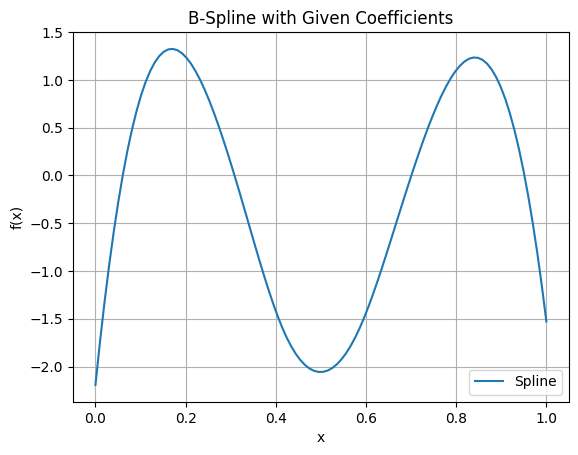

Spline Formula:
1.542885 * B_0(x)
0.927761 * B_1(x)
-0.384994 * B_2(x)
-1.782885 * B_3(x)
-2.199617 * B_4(x)
-1.762594 * B_5(x)
-0.499718 * B_6(x)
0.744116 * B_7(x)
1.417097 * B_8(x)


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Given parameters
coefficients = np.array([ 1.5428853 ,  0.92776054, -0.38499445, -1.7828847 , -2.1996174 ,
        -1.7625941 , -0.49971792,  0.74411625,  1.4170966 ], dtype=np.float32)

# Define the degree of the spline (cubic B-spline)
degree = 3

# Define the knot vector (assuming equally spaced knots for simplicity)
n_knots = len(coefficients) + degree + 1
knots = np.linspace(0, 1, n_knots)

# Create the B-spline
spline = BSpline(knots, coefficients, degree)

# Define a function to represent the spline formula
def spline_formula(x):
    return spline(x)

# Plot the spline
x_vals = np.linspace(0, 1, 100)
y_vals = spline_formula(x_vals)

plt.plot(x_vals, y_vals, label='Spline')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('B-Spline with Given Coefficients')
plt.legend()
plt.grid(True)
plt.show()

# Print the exact mathematical formula (coefficients and basis functions)
print("Spline Formula:")
for i, coef in enumerate(coefficients):
    print(f"{coef:.6f} * B_{i}(x)")

In [45]:
n_knots

13

In [46]:
spline.t

array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
       0.83333333, 0.91666667, 1.        ])

In [47]:
spline.c

array([ 1.5428853 ,  0.92776054, -0.38499445, -1.78288472, -2.19961739,
       -1.7625941 , -0.49971792,  0.74411625,  1.41709661])

In [48]:
len(spline.t)

13

In [49]:
sddr.p
bins = 10

In [50]:
sddr.dataset._data

,x1,x2
0,0.159362,1.820832
1,-0.801953,-1.098624
2,0.898769,1.322290
3,-0.591773,0.217637
4,0.483823,1.811813
...,...,...
795,0.635545,0.520376
796,0.964305,1.952867
797,-1.715956,1.037898
798,-1.861070,0.190763


In [51]:
sddr.config['train_parameters']

{'batch_size': 1000,
 'epochs': 200,
 'degrees_of_freedom': {'rate': 6},
 'optimizer': torch.optim.rmsprop.RMSprop,
 'val_split': 0.1,
 'dropout_rate': 0.1}

In [52]:
for batch in sddr.train_loader:
    # for each batch
    target = batch['target'].float().to(sddr.device)
    datadict = batch['datadict']
    
    # send each input batch to the current device
    for param in datadict.keys():
        for data_part in datadict[param].keys():
            datadict[param][data_part] = datadict[param][data_part].to(sddr.device)
            
    # get the network output
    sddr.optimizer.zero_grad()
    output = sddr.net(datadict)

In [53]:
datadict.keys()

dict_keys(['rate'])

In [54]:
datadict['rate']['structured']

tensor([[ 1.0000, -0.0467, -0.0889,  ..., -0.1205, -0.0772, -0.0419],
        [ 1.0000,  0.0133,  0.4793,  ..., -0.1237, -0.0772, -0.0419],
        [ 1.0000, -0.0192,  0.4250,  ..., -0.1011,  0.2255,  0.6323],
        ...,
        [ 1.0000, -0.0467, -0.0889,  ...,  0.2539, -0.0622, -0.0419],
        [ 1.0000, -0.0467, -0.0889,  ..., -0.1237, -0.0772, -0.0419],
        [ 1.0000, -0.0467, -0.0889,  ..., -0.1237, -0.0772, -0.0419]])

In [55]:
sddr.net

SddrNet(
  (rate): SddrFormulaNet(
    (d1): Sequential(
      (0): Linear(in_features=1, out_features=15, bias=True)
    )
    (d2): Sequential(
      (0): Linear(in_features=1, out_features=3, bias=True)
      (1): ReLU()
      (2): Linear(in_features=3, out_features=8, bias=True)
    )
    (structured_head): Linear(in_features=19, out_features=1, bias=False)
    (deep_head): Linear(in_features=23, out_features=1, bias=False)
  )
)

In [56]:
sddr.net.distribution_layer

Poisson(rate: torch.Size([720, 1]))

In [57]:
sddr.net.single_parameter_sddr_list['rate']()

TypeError: forward() missing 1 required positional argument: 'datadict'

In [58]:
sddr.P['rate'].size()

torch.Size([19, 19])

In [59]:
import torch
import numpy as np
partial_effects = []
can_plot = []
xlabels = []
ylabels = []

# for each spline
for spline_slice, spline_input_features, term_name in zip(list_of_spline_slices, list_of_spline_input_features, list_of_term_names):
    print("spline_slice: ", spline_slice)
    print("spline_input_features:", spline_input_features)
    print("term_name", term_name)
    
    # if only one feature was sent as input to spline
    if len(spline_input_features) == 1:
        # get that feature
        feature = get_feature(spline_input_features[0])
        # and keep track so that the partial effect of this spline can be plotted later on
        can_plot.append(True)
        ylabels.append(term_name)
        xlabels.append(spline_input_features[0])
    else:
        feature = []
        for feature_name in spline_input_features:
            feature.append(get_feature(feature_name))
        # the partial effect of this spline cannot be plotted later on - too complicated for now as not 2d
        can_plot.append(False)
        
    # use dropout to calculate uncertainty
    # if sddr.p == 0:
        # structured_pred = torch.matmul(smoothed_structured[:,spline_slice], structured_head_params[0, spline_slice])
        # partial_effects.append((feature, structured_pred))
    # else:
    structured_pred_dropout = []
    for dropout_iteration in range(1000):
        mask = torch.bernoulli(torch.full([1,structured_head_params.shape[1]], 1-sddr.p).float()).int()
        structured_head_params_dropout = mask * structured_head_params
        print(structured_head_params_dropout)
        structured_pred = torch.matmul(smoothed_structured[:,spline_slice], structured_head_params_dropout[0, spline_slice])*(1/(1-sddr.p))
        structured_pred_dropout.append(structured_pred.numpy())
    
    # mean of the dropouted result
    structured_pred = np.mean(np.array(structured_pred_dropout),axis=0)
    # calculate 95% quantile and 50% quantile
    ci950 = np.quantile(np.array(structured_pred_dropout), 0.025, axis=0)
    ci951 = np.quantile(np.array(structured_pred_dropout), 0.975, axis=0)
    ci250 = np.quantile(np.array(structured_pred_dropout), 0.25, axis=0)
    ci251 = np.quantile(np.array(structured_pred_dropout), 0.75, axis=0)
                        
    partial_effects.append((feature, structured_pred, ci950, ci951, ci250, ci251))
    

spline_slice:  slice(1, 10, None)
spline_input_features: ['x1']
term_name spline(x1, bs="bs", df=9)
tensor([[ 2.1829,  1.3384,  0.7630, -0.4465, -1.7169, -2.0911, -1.6868, -0.5509,
          0.5762,  1.1921,  0.0000,  1.3122,  0.9261,  0.2432, -0.4423, -1.1123,
         -1.7539, -2.1579, -2.3789]])
tensor([[ 2.1829,  1.3384,  0.7630, -0.4465, -1.7169, -2.0911, -1.6868, -0.5509,
          0.0000,  1.1921,  1.5249,  1.3122,  0.9261,  0.2432, -0.4423, -0.0000,
         -1.7539, -2.1579, -2.3789]])
tensor([[ 2.1829,  1.3384,  0.7630, -0.4465, -1.7169, -0.0000, -1.6868, -0.5509,
          0.0000,  1.1921,  1.5249,  1.3122,  0.9261,  0.2432, -0.4423, -1.1123,
         -1.7539, -2.1579, -2.3789]])
tensor([[ 0.0000,  0.0000,  0.7630, -0.4465, -0.0000, -2.0911, -0.0000, -0.5509,
          0.5762,  1.1921,  1.5249,  1.3122,  0.9261,  0.2432, -0.4423, -1.1123,
         -0.0000, -2.1579, -2.3789]])
tensor([[ 2.1829,  1.3384,  0.7630, -0.4465, -1.7169, -2.0911, -1.6868, -0.5509,
          0.5762,  

In [75]:
np.array(structured_pred_dropout)

array([[-1.8863367 ,  0.79941183, -1.416677  , ..., -1.1361068 ,
        -0.20878203, -0.97422266],
       [-0.8414134 ,  1.1215277 , -1.6436474 , ..., -1.373054  ,
        -0.4457292 , -1.2111698 ],
       [-2.0124302 ,  1.2323811 , -1.5427705 , ..., -1.2622006 ,
        -0.3348757 , -1.1003163 ],
       ...,
       [-2.2218418 ,  1.0204465 , -1.6005024 , ..., -1.0381677 ,
        -0.01312104, -0.68834263],
       [-2.0970566 ,  1.1503457 , -1.627397  , ..., -1.3455565 ,
        -0.15987477, -1.1750778 ],
       [-1.8958454 ,  1.2498125 , -1.4261857 , ..., -1.1456156 ,
        -0.21829079, -0.9837314 ]], dtype=float32)

In [78]:
feature

array([ 1.82083249, -1.09862421,  1.32229034,  0.21763747,  1.8118127 ,
        1.46092919, -1.13879003, -0.06487997,  1.16561503, -1.07068663,
        1.05600954,  0.70825927,  1.71714662,  0.09929968, -0.98171835,
        0.18434156,  0.20740853, -0.18680073,  0.75890637, -0.43440173,
       -0.94889983, -1.71975888,  0.36422317, -0.24811394,  0.5802897 ,
       -1.92185436,  1.15626754, -1.23562423, -0.05445358,  0.69348502,
        1.51296835, -1.18376154, -1.31360607, -0.64208422,  0.40278182,
        0.87062714, -0.86685378,  0.28642183,  1.38560192, -0.83683723,
        1.07665075,  1.96823897, -1.20382758, -1.86806501, -1.07457164,
       -1.01882171,  1.0406897 , -0.4439943 ,  1.14732928, -1.03831078,
       -0.57028715, -1.77574484,  1.0403028 , -1.42032461, -0.0942424 ,
        0.56715071, -1.31240621, -0.41660155,  1.1286395 ,  0.10142997,
       -1.83207373, -1.08163837, -1.94382353, -1.18690368,  0.64061286,
        0.1410388 ,  0.59820334, -1.48034105, -1.56485734,  0.05

In [73]:
len(structured_pred_dropout[0])

800

In [61]:
len(partial_effects)

2

In [88]:
print(structured_pred.size())
print(len(partial_effects), len(partial_effects[0]),len(partial_effects[0][0]))

torch.Size([800])
2 2 800


In [68]:
partial_effects[0][0]

array([ 1.59361998e-01, -8.01953486e-01,  8.98768844e-01, -5.91773414e-01,
        4.83822969e-01, -1.28540023e+00,  1.43184024e-01, -1.89570373e+00,
       -1.30890887e+00, -4.43929434e-03,  1.65076149e+00, -1.89340855e+00,
        1.11106995e+00,  1.60027409e+00, -8.10257307e-01, -1.89224463e+00,
        1.35058008e+00, -1.73209766e+00, -1.03111590e+00,  4.91812119e-01,
       -1.79668101e+00, -9.41795940e-02,  5.88484587e-01, -2.87416816e-01,
        9.20381788e-01,  1.60131713e-01, -1.95818003e+00, -6.14998720e-01,
       -7.45352690e-01,  1.86281577e+00, -8.77814824e-02, -1.17347505e+00,
        1.36123321e+00, -2.56625130e-01, -1.85083405e-01, -9.64998435e-02,
        1.82815572e+00,  7.77673675e-02, -5.66949333e-01,  1.23293710e+00,
       -8.02380473e-01,  2.24942321e-01,  1.18174154e+00,  1.64044180e+00,
       -1.92609677e+00,  2.08755194e-01,  5.45501365e-01, -1.58691509e-02,
        1.75452354e+00, -1.86029696e+00, -8.25851120e-01,  6.73906535e-01,
       -1.50478028e+00,  

In [66]:
len(partial_effects[1])

6

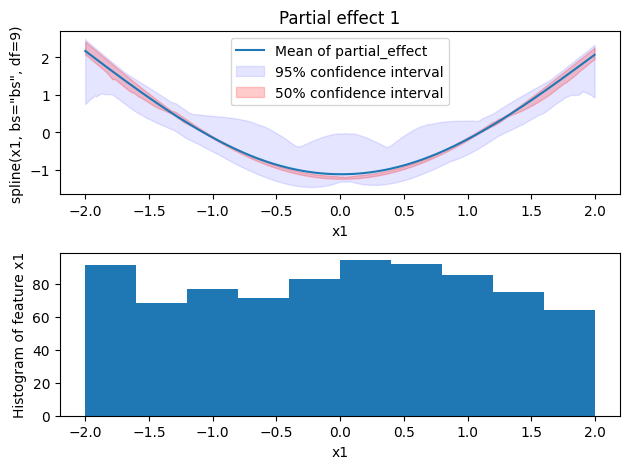

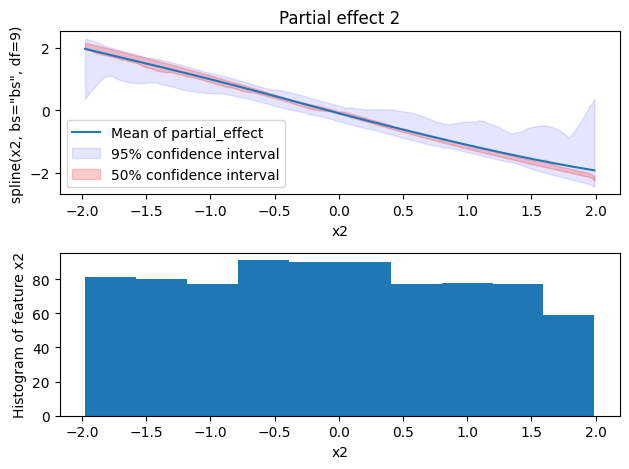

In [60]:
num_plots =  sum(can_plot)
if num_plots == 0:
    print('Nothing to plot. No (non-)linear partial effects specified for this parameter. (Deep partial effects are not plotted.)')
elif num_plots != len(partial_effects):
    print('Cannot plot ', len(partial_effects) - num_plots, ' splines because they have more that one input')

for i in range(len(partial_effects)):
    if can_plot[i]:
        
        # if self.p == 0:
        #     feature, partial_effect = partial_effects[i]
        #     partial_effect = [x for _,x in sorted(zip(feature, partial_effect))]
        #     plt.subplot(2,1,1)
        #     plt.scatter(np.sort(feature), partial_effect)
        #     plt.title('Partial effect %s' % (i+1))
        #     plt.ylabel(ylabels[i])
        #     plt.xlabel(xlabels[i])
        #     plt.subplot(2,1,2)
        #     plt.hist(feature,bins=bins)
        #     plt.ylabel('Histogram of feature {}'.format(xlabels[i]))
        #     plt.xlabel(xlabels[i])
        #     plt.tight_layout()
        #     plt.show()
        # else:
        feature, partial_effect, ci950, ci951, ci250, ci251 = partial_effects[i]
        re = np.array([[x,y,m,n,o] for _,x,y,m,n,o in sorted(zip(feature, partial_effect, ci950, ci951, ci250, ci251))])
        partial_effect, ci950, ci951, ci250, ci251 = re[:,0],re[:,1],re[:,2],re[:,3],re[:,4]
        plt.subplot(2,1,1)
        plt.plot(np.sort(feature), partial_effect,label='Mean of partial_effect')
        plt.fill_between(np.sort(feature), ci950, ci951, color='b', alpha=.1, label='95% confidence interval')
        plt.fill_between(np.sort(feature), ci250, ci251, color='r', alpha=.2,label='50% confidence interval')
        plt.legend()
        plt.title('Partial effect %s' % (i+1))
        plt.ylabel(ylabels[i])
        plt.xlabel(xlabels[i])
        plt.subplot(2,1,2)
        plt.hist(feature,bins=bins)
        plt.ylabel('Histogram of feature {}'.format(xlabels[i]))
        plt.xlabel(xlabels[i])
        plt.tight_layout()
        plt.show()
#             plt.savefig(os.path.join(self.config['output_dir'], 'partial_effects.png'))

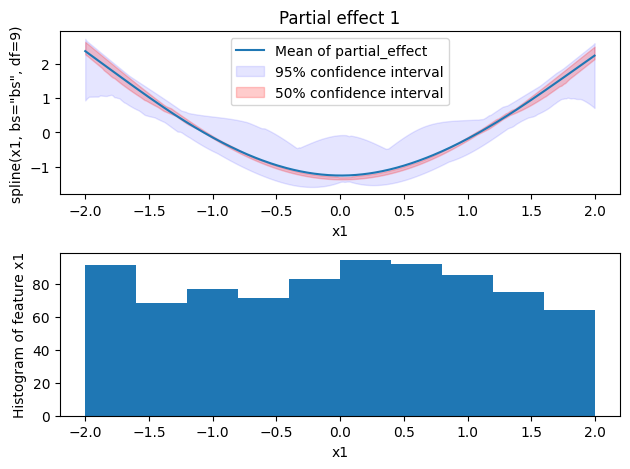

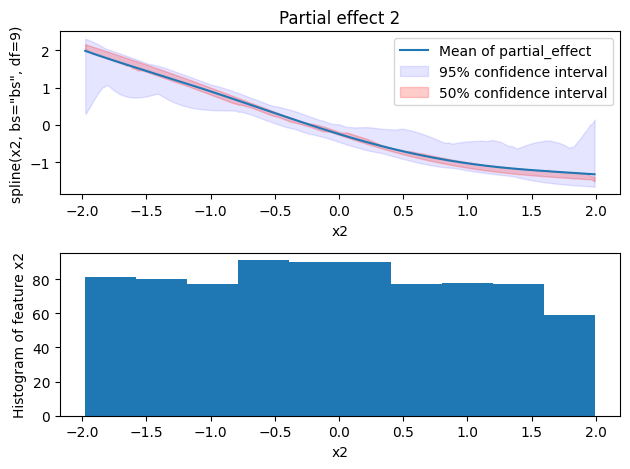

In [14]:
partial_effects = sddr.eval('rate')

In [77]:
len(partial_effects)

2

In [22]:
len(partial_effects[0])

6

In [24]:
len(partial_effects[0][0])

800

### Save, load and resume

Next, we save the trained model. Along with the model's weights, the optimizer current state will be saved, along with the number of epochs we trained for and the final loss function

In [8]:
sddr.save('model_gam.pth')

/var/folders/_r/2bb406lx12s1sf_jpr_0v1mw0000gn/T/ipykernel_39567/3281699059.py:1: UserWarning: Please note that the metadata for the structured input has not been saved. If you want to load the model and use
        it on new data you will need to also give the structured data used for training as input to the load function.
  sddr.save('model_gam.pth')


To resume training at a later state we need to again initialize an sddr instance, load the previously trained model and resume training. Note that the ```resume=True``` flag needs to be set here when calling ```sddr.train```. Also note that here ```epochs``` is set to 300, while previously the network was trained for ```200``` epochs. This means that the model during resume will train for 300-200=100 epochs more

In [9]:
train_parameters['epochs'] = 300
sddr_resume = Sddr(output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)
sddr_resume.load('./outputs/model_gam.pth', train_data)
sddr_resume.train(target=train_target, structured_data=train_data, resume=True)
loss_resume = sddr_resume.epoch_train_loss

Using device:  cpu
Loaded model ./outputs/model_gam.pth at epoch 200 with a validation loss of 10.9606
Beginning training ...


/Users/dingyi/Documents/Github/VI/.venv/lib/python3.9/site-packages/sddr/sddr.py:471: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_name, map_l

Train Epoch: 210 	 Training Loss: 17.470036
Train Epoch: 210 	 Validation Loss: 28.826176
Train Epoch: 240 	 Training Loss: 17.187927
Train Epoch: 240 	 Validation Loss: 15.073912
Train Epoch: 270 	 Training Loss: 16.178101
Train Epoch: 270 	 Validation Loss: 12.057195


### Predicting

A trained model can also be used for predictions on unseen data. Note that when loading the model the structured training data is required to compute the knots of the basis functions used for the smoothing terms. The final line in this cell is commented out as it would give an error if run. Why? Check out the explanation below!

In [10]:
# initialize
pred_sddr = Sddr(distribution=distribution,
                formulas=formulas,
                deep_models_dict=deep_models_dict,
                train_parameters=train_parameters,
                output_dir=output_dir)
# load trained model
pred_sddr.load('./outputs/model_gam.pth', train_data)
# make predictions
#_, partial_effects_loaded = pred_sddr.predict(test_data, plot=True)

Using device:  cpu
Loaded model ./outputs/model_gam.pth at epoch 200 with a validation loss of 10.9606


/Users/dingyi/Documents/Github/VI/.venv/lib/python3.9/site-packages/sddr/sddr.py:471: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_name, map_l

The above error occurs because the test data is outside the range of the training data. The framework can deal with this problem by allowing clipping of the test data. For clipping the corresponding parameter needs to be set to ```True``` when calling ```predict()```

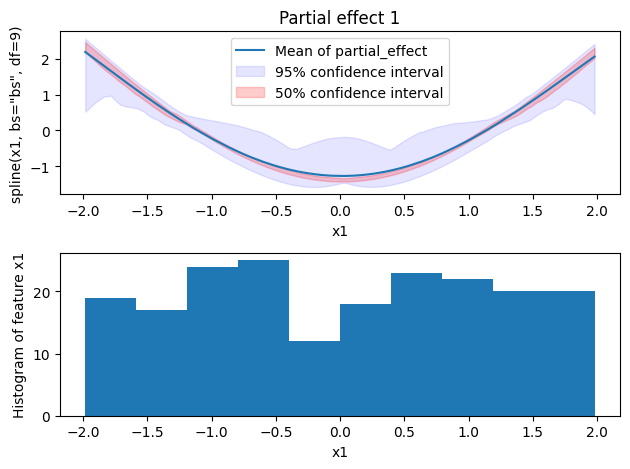

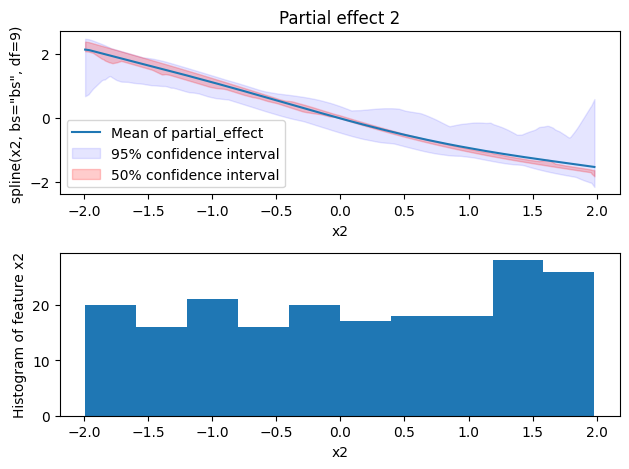

In [11]:
_, partial_effects_loaded = pred_sddr.predict(test_data, clipping=True, plot=True)

### Predicted Distribution

To get the distribution simply call:

In [12]:
distribution_layer = pred_sddr.get_distribution()

From there we can retrieve many of the distribution's properties. See some examples here:

In [13]:
mean = distribution_layer.mean
std = distribution_layer.stddev

# Second use case: GAMLSS - Logistic Distribution

In this example the input data follows a logistic distribution. Therefore, here we have two distributional parameters, which means that two fomulas need to be defined (which in turn means two SDDRFormulaNets will be created). Additinaly degrees of freedom for the regularization of the loss need to be given for each distributional parameter

### User inputs 

Once again first the user defines the data to be used. Note that this time we are not pre-loading the data as a pandas dataframe, but will give the framework directly the data paths:

In [14]:
data_path = '../data/gamlss/X.csv'
target_path = '../data/gamlss/Y.csv'

Next the distribution, formulas and training parameters are defined. Note that PySDDR also support batching: in this example a batch size smaller than the size of the data is defined.

In [15]:
distribution  = 'Logistic'

formulas = {'loc': '~1+spline(x1, bs="bs", df=4)+spline(x2, bs="bs",df=4) + d1(x1)+d2(x2)',
            'scale': '~1 + spline(x3, bs="bs",df=4) + spline(x4, bs="bs",df=4)'
            }

deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
    'batch_size': 100,
    'epochs': 1000,
    'degrees_of_freedom': {'loc': [5,5], 'scale':[5,10]},
    'optimizer' : optim.RMSprop,
    'val_split': 0.15,
    'early_stop_epochs': 100,
    'early_stop_epsilon': 0.0001
}

Note that in the training parameters defined above we have also included early stopping parameters. In this case training will stop (before the 1000 epochs defined) if the validation loss is not dropping by more than 10e-4 for 100 epochs. 

### Initialization

The sddr instance is initialized with the parameters given by the user in the previous step. This time we do not specify an output directory which means all outputs will be stored in the current working directory.

In [16]:
sddr = Sddr(distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

Using device:  cpu


### Training

Again in this example we train our network with our training data


/Users/dingyi/Documents/Github/VI/.venv/lib/python3.9/site-packages/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 5) cannot be larger than the rank of the design matrix (rank = 4). 
            Unpenalized base-learner with df = 4 will be used. Re-consider model specification.
  df_lam = df2lambda(dm_spline, P[0], df)
/Users/dingyi/Documents/Github/VI/.venv/lib/python3.9/site-packages/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 5) cannot be larger than the rank of the design matrix (rank = 4). 
            Unpenalized base-learner with df = 4 will be used. Re-consider model specification.
  df_lam = df2lambda(dm_spline, P[0], df)
/Users/dingyi/Documents/Github/VI/.venv/lib/python3.9/site-packages/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 5) cannot be larger than the rank of the design matrix (rank = 4). 
            Unpenalized base-learner with df = 4 will be used. Re-consider model spec

Beginning training ...
Train Epoch: 0 	 Training Loss: 2.694393
Train Epoch: 0 	 Validation Loss: 2.547950
Train Epoch: 100 	 Training Loss: 2.281517
Train Epoch: 100 	 Validation Loss: 2.266100
Validation loss has not improved for the last 100 epochs! To avoid overfitting we are going to stop training now


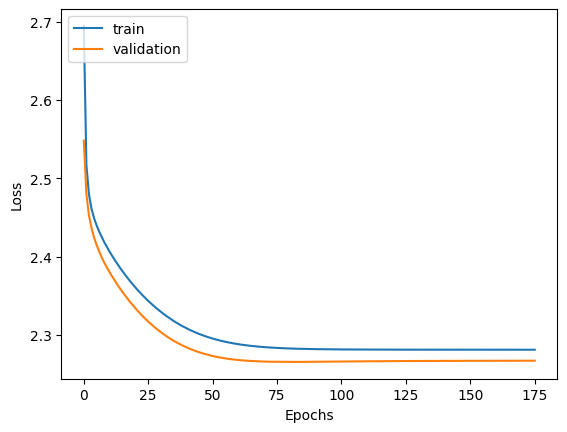

In [17]:
#instead of giving a data and target as data frames, here we give the path and the data is loaded automatically
sddr.train(structured_data=data_path,
           target=target_path,
           plot=True)

Note that when using early stopping the training stops after about 150 epochs. This helps avoid overfitting and we can also see from the loss plots that the model has converged and overfitting has been avoided (the validation loss is not much larger than the training loss). This means that the choice of hyperparameters for early stopping was correct. 

### Visualizing the partial effects

In this case the model is a generalized additive model with:

* two splines: one has a quadratic effect, one has only a linear effect for the mean ('loc') parameter 
* two splines: one has only a linear effect with slope 0.5, one has the form sin(4*x)) for the scale parameter.

 These effects are confirmed when plotting the partial effects below.

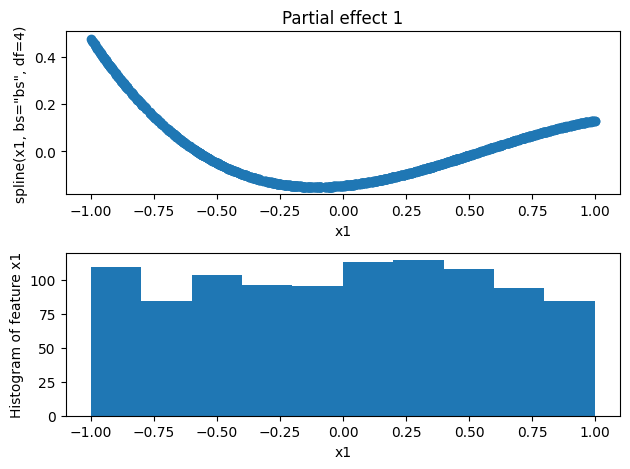

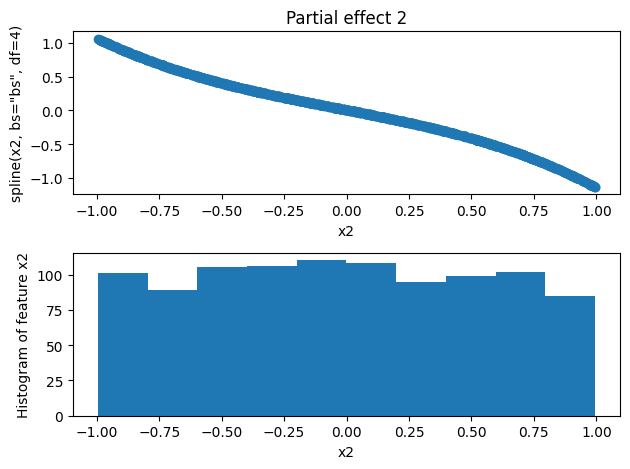

In [18]:
partial_effects_loc = sddr.eval('loc')

/Users/ruolinshen/opt/anaconda3/envs/test/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


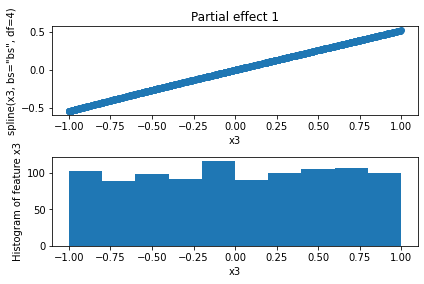

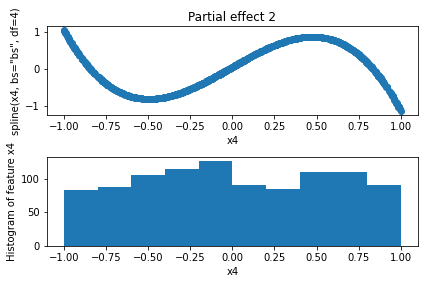

In [19]:
partial_effects_scale = sddr.eval('scale')

### Orthogonalization

As explained in the readme the model in pysddr has two orthogonalization steps that work in a similar manner: 

1. Orthogonalization between linear and smooth terms to remove any linear effects from smooth terms and leave only non-linear features (performed during pre-processing) and
2. Orthogonalization between smooth terms and unstructured outputs to remove any effects from smooth terms in unstructured part (performed during every forward pass of the network)

To visualize the effect of orthogonalization, in the example below we change the formulas from above and add the linear feature x3 to the linear part of the scale formula. We then re-train our model based on the new formula and visualize the partial effects.

Using device:  cpu
Beginning training ...
Train Epoch: 0 	 Training Loss: 2.616149
Train Epoch: 0 	 Validation Loss: 2.508461


/Users/dingyi/Documents/Github/VI/.venv/lib/python3.9/site-packages/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 5) cannot be larger than the rank of the design matrix (rank = 4). 
            Unpenalized base-learner with df = 4 will be used. Re-consider model specification.
  df_lam = df2lambda(dm_spline, P[0], df)
/Users/dingyi/Documents/Github/VI/.venv/lib/python3.9/site-packages/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 5) cannot be larger than the rank of the design matrix (rank = 4). 
            Unpenalized base-learner with df = 4 will be used. Re-consider model specification.
  df_lam = df2lambda(dm_spline, P[0], df)
/Users/dingyi/Documents/Github/VI/.venv/lib/python3.9/site-packages/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 5) cannot be larger than the rank of the design matrix (rank = 4). 
            Unpenalized base-learner with df = 4 will be used. Re-consider model spec

Train Epoch: 100 	 Training Loss: 2.284142
Train Epoch: 100 	 Validation Loss: 2.335229
Validation loss has not improved for the last 100 epochs! To avoid overfitting we are going to stop training now


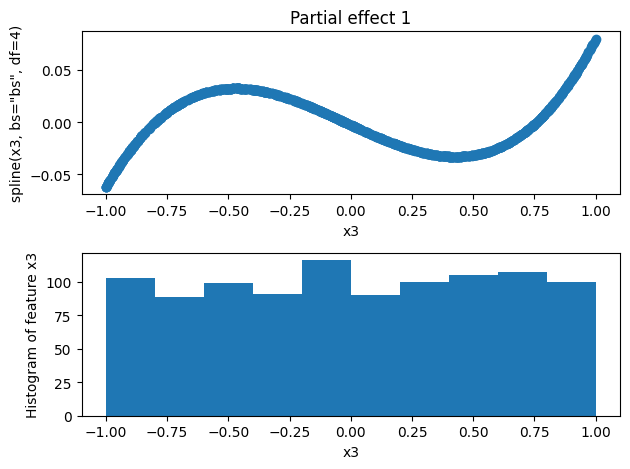

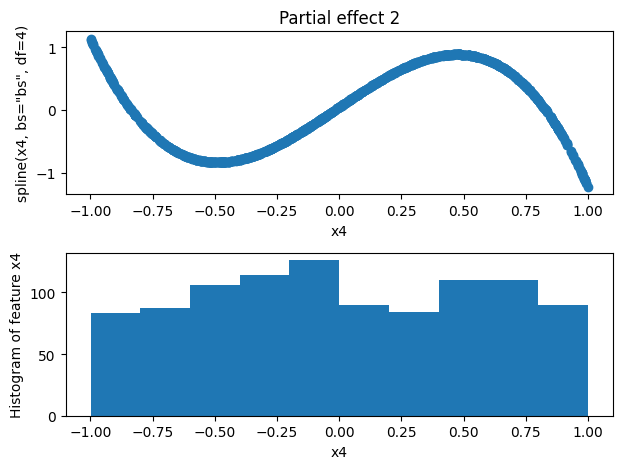

In [19]:
formulas = {'loc': '~1+spline(x1, bs="bs", df=4)+spline(x2, bs="bs",df=4) + d1(x1)+d2(x2)',
            'scale': '~x3 + spline(x3, bs="bs",df=4) + spline(x4, bs="bs",df=4)'
            }
sddr = Sddr(distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

sddr.train(structured_data=data_path,
           target=target_path)

partial_effects_scale = sddr.eval('scale')

As expected the orthogonalization has removed the effect of feature x3 (Partial effect 1) from the smooth terms as it is a linear feature which can be fully represented by the linear part of the network. The values in the y-axis are so small resulting in this partial effect actually having little or no effect. In addition, we can check the linear effects using the coef function to see if the actual linear effect is recovered well.

In [20]:
sddr.coeff('scale')

{'Intercept': array([0.2727016], dtype=float32),
 'x3': array([0.52077055], dtype=float32),
 'spline(x3, bs="bs", df=4)': array([-0.14935222,  0.11233928, -0.33147115, -0.03868719], dtype=float32),
 'spline(x4, bs="bs", df=4)': array([ 0.87543935, -4.947889  ,  4.5792584 , -1.4902192 ], dtype=float32)}